# Cyber Analytics in Python

Please make sure you signed in and filled out a waiver form. 


### Introduction
Cyber threat analysis is the process of recognizing and monitoring vulnerabilities in a system and analysing thier trends in order to come up with solutions to prevent and comnbat them. With increasing cyber threats in today's society, intelligence analysts are in high demand.

This workshop will cover the basics of integrating cyber security tools such as nmap and BeautifulSoup into python to automate scans. We will be doing all testing on the web server hackthissite.org. 

## Modules
These are the modules we will be using

In [48]:
%matplotlib inline

import nmap       # Network monitoring and packet analysis
import sys        # Used to handle exceptions
import socket     # Basis of most cyber-security python libraries. 
import pandas as pd     # Data analysis
import seaborn as sns
import matplotlib.pyplot as plt



## Nmap (In Development)
Nmap is a network packet monitoring tool that collects packets in order to find out information about the system that is sending and recievng them.

### Setup
To use nmap we will have to do some quick setup. 

Windows: Press windows button and then type <code>Anaconda Prompt</code>. From there type <code>pip install python-nmap</code>. 

Mac: Open terminal and type <code>pip install python-nmap</code>


#### Necessary Information
- Host Address
- Port Ranges


In [2]:
hostaddress = 'hackthissite.org' # The website we are hacking
ipaddress = socket.gethostbyname(hostaddress)
print('Target IP: '+ipaddress)

Target IP: 198.148.81.139


#### Scanning

In [8]:
ports = '0-1024'
nm = nmap.PortScanner()
nm.scan(hostaddress,ports)

{'nmap': {'command_line': 'nmap -oX - -p 0-1024 -sV hackthissite.org',
  'scaninfo': {'error': ["Strange read error from 198.148.81.136 (49 - 'Can't assign requested address')\n"],
   'tcp': {'method': 'connect', 'services': '0-1024'}},
  'scanstats': {'downhosts': '0',
   'elapsed': '172.90',
   'timestr': 'Wed Sep 12 22:29:57 2018',
   'totalhosts': '1',
   'uphosts': '1'}},
 'scan': {'198.148.81.136': {'addresses': {'ipv4': '198.148.81.136'},
   'hostnames': [{'name': 'hackthissite.org', 'type': 'user'},
    {'name': 'hackthissite.org', 'type': 'PTR'}],
   'status': {'reason': 'syn-ack', 'state': 'up'},
   'tcp': {22: {'conf': '10',
     'cpe': 'cpe:/o:freebsd:freebsd',
     'extrainfo': 'FreeBSD 20110102; protocol 2.0',
     'name': 'ssh',
     'product': 'OpenSSH',
     'reason': 'syn-ack',
     'state': 'open',
     'version': '5.8p1_hpn13v10'},
    80: {'conf': '10',
     'cpe': 'cpe:/a:igor_sysoev:nginx',
     'extrainfo': '',
     'name': 'http',
     'product': 'nginx',
     

Printing the results

In [4]:
for host in nm.all_hosts():
    print('Host: ' + host + "(" + hostaddress + ")")
    print("State: " + nm[host].state())
    for protocol in nm[host].all_protocols():
        print("Protocol: " + protocol)
        port = nm[host][protocol].keys()
        for p in port:
            print("Port: " + str(p) + "\t State: " + nm[host][protocol][p]['state'])
    

Host: 198.148.81.138(hackthissite.org)
State: up
Protocol: tcp
Port: 22	 State: open
Port: 80	 State: open


## AWS Honeypott Data

Now lets look at some data. Honeypotts in cybrsecurity are dummy vulnerable machines that are used to monitor and study hackers. Hackers from all overthe world hack these machines and the data collected from these attacks is then studied by white hats (good guys) in order to protect against these attacks. 

Lets look at how we can use this data to our advantage

In [3]:
attacks = pd.read_csv("awshoneypot_data.csv")
attacks.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


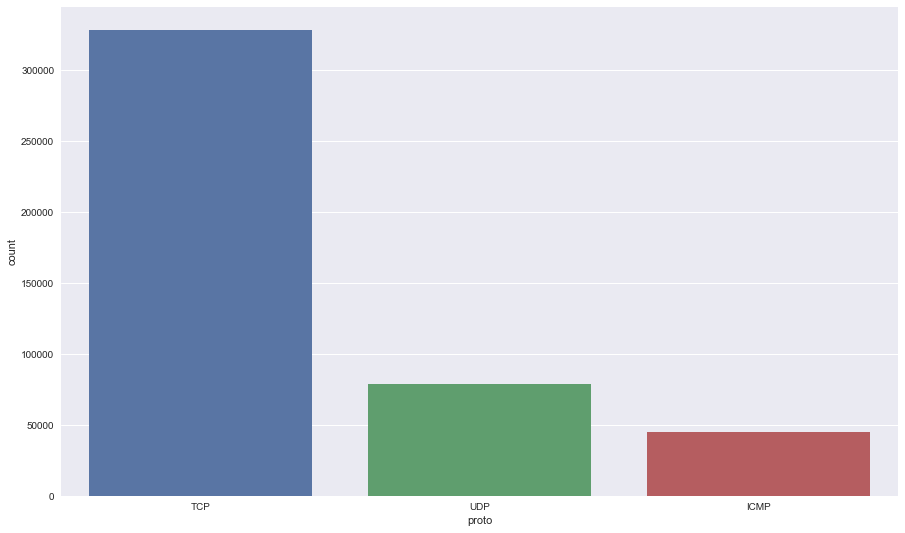

In [42]:
sns.set(style = 'darkgrid')
f, ax = plt.subplots(figsize=(15, 9))
sns.despine(f, left=True, bottom=True)
countplt = sns.countplot(x = 'proto', data = attacks)

In [5]:
# creating new column in dataframe
#attacks['count'] = attacks.groupby('country')['country'].transform(pd.Series.value_counts) 
attacks['country'].unique()
# attacks['freq'] = attacks.groupby('country')['country'].transform('count')
# attacks.drop(columns = 'freq')
attacks.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


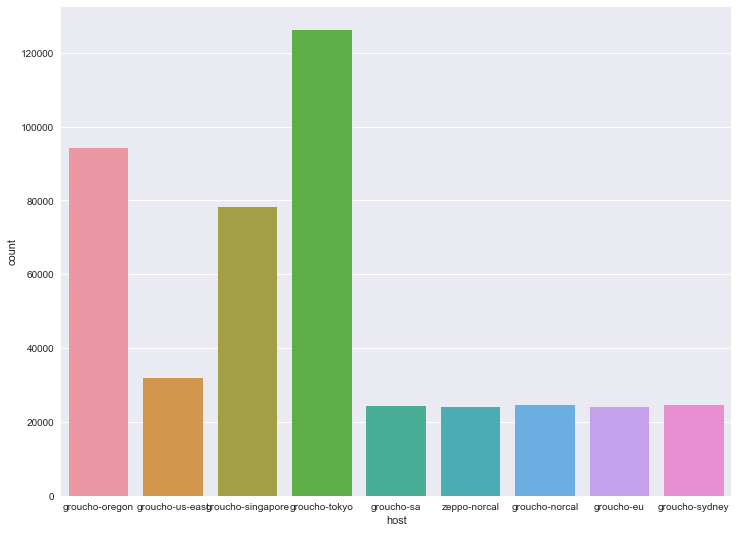

In [33]:
f, ax = plt.subplots(figsize=(12, 9))
sns.despine(f, left=True, bottom=True)
scatplt = sns.countplot(x = 'host', data = attacks)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [50]:
scatplt = sns.scatterplot(x = 'latitude', y = 'longitude', data = attacks)

AttributeError: module 'seaborn' has no attribute 'scatterplot'